In [1]:
%load_ext autoreload
%autoreload 2
from autograd import grad
import autograd.numpy as np
import autograd.numpy.random as npr
import autograd.scipy.special as sp

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec

import seaborn as sns
color_names = ["windows blue",
               "red",
               "gold",
               "grass green"]
colors = sns.xkcd_palette(color_names)
sns.set_style("white")

In [2]:
def h(eps,alpha):
    b = alpha -1./3.
    c = 1./np.sqrt(9.*b)
    v = 1.+c*eps
    
    return b*(v**3)

def grad_h(eps, alpha):
    """
    Gradient of reparameterization without boosting.
    """
    b = alpha - 1./3.
    c = 1./np.sqrt(9.*b)
    v = 1.+eps*c
    
    return v**3 - 13.5*eps*b*(v**2)*(c**3)

def grad_logr(eps, alpha):
    """
    Gradient of log-proposal.
    """
    b = alpha - 1./3.
    c = 1./np.sqrt(9.*b)
    v = 1.+eps*c
    
    return -0.5/b + 9.*eps*(c**3)/v
    
def grad_logq(eps, alpha):
    """
    Gradient of log-Gamma at proposed value.
    """
    h_val = h(eps, alpha)
    h_der = grad_h(eps, alpha)
    
    return np.log(h_val) + (alpha-1.)*h_der/h_val - h_der - sp.digamma(alpha)

def gamma_correction(eps,alpha):
    return grad_logq(eps,alpha)-grad_logr(eps,alpha)

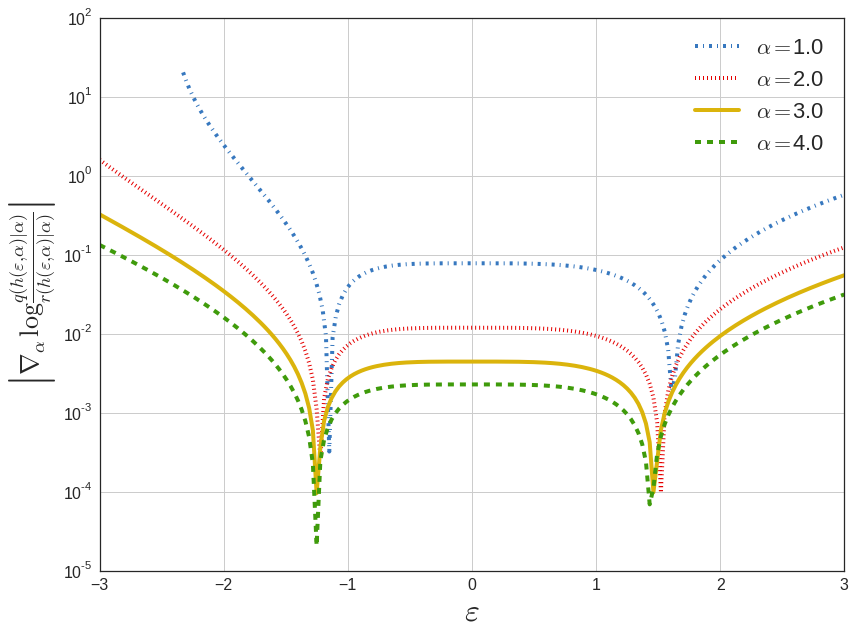

In [3]:
alphas = np.array([1.,2.,3.,4.])
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
styles = ['-.',':','-','--']

for i in range(alphas.shape[0]):
    epsmin = max(-np.sqrt(9.*alphas[i]-3.)*0.95,-3.)
    epsilon = np.linspace(epsmin,3.,200)
    correction = np.abs(gamma_correction(epsilon,alphas[i]))
    ax.semilogy(epsilon, correction, styles[i], color = colors[i], lw=4, label = '$\\alpha = $'+str(alphas[i]))
ax.grid()
ax.set_xlabel("$\\varepsilon$", fontsize=32)
ylab = "$\\left|\\nabla_\\alpha \\log{\\frac{q(h(\\varepsilon,\\alpha)|\\alpha)}{r(h(\\varepsilon,\\alpha)|\\alpha)}}\\right|$"
ax.set_ylabel(ylab, fontsize=26)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.legend(loc='best',fontsize=22)
plt.tight_layout()
plt.savefig("./correction.pdf",dpi=300)